In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline#内嵌画图，省略plt.show()

In [6]:
columns = ['user_id','order_day','order_number','order_price']
data = pd.read_table('CDNOW.txt',names = columns,sep="\s+")
data.head()

user_id  order_day  order_number  order_price
0        1   19970101             1        11.77
1        2   19970112             1        12.00
2        2   19970112             5        77.00
3        3   19970102             2        20.76
4        3   19970330             2        20.76

In [7]:
data.describe()#描述性统计分析

user_id     order_day  order_number   order_price
count  69659.000000  6.965900e+04  69659.000000  69659.000000
mean   11470.854592  1.997228e+07      2.410040     35.893648
std     6819.904848  3.837735e+03      2.333924     36.281942
min        1.000000  1.997010e+07      1.000000      0.000000
25%     5506.000000  1.997022e+07      1.000000     14.490000
50%    11410.000000  1.997042e+07      2.000000     25.980000
75%    17273.000000  1.997111e+07      3.000000     43.700000
max    23570.000000  1.998063e+07     99.000000   1286.010000

In [8]:
#得出结论，用户平均购买2.4个商品，标准差为2.3，中位数为2个商品，75分位数为3个商品，
#说明大部分订单数量都不多，单个用户购买商品最大值为99个

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id         69659 non-null int64
order_day       69659 non-null int64
order_number    69659 non-null int64
order_price     69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [10]:
#数据集没有缺失项

In [15]:
from datetime import datetime
data['order_date'] = pd.to_datetime(data.order_day,format = '%Y%m%d')
#pd.to_datetime将特定的字符串或者数字转换成时间格式
data['month'] = data.order_date.astype('datetime64[M]')
#astype将时间格式装换，[M]转换成月份。将日期化作月份处理数据

In [16]:
data.head()

user_id  order_day  order_number  order_price order_date      month
0        1   19970101             1        11.77 1997-01-01 1997-01-01
1        2   19970112             1        12.00 1997-01-12 1997-01-01
2        2   19970112             5        77.00 1997-01-12 1997-01-01
3        3   19970102             2        20.76 1997-01-02 1997-01-01
4        3   19970330             2        20.76 1997-03-30 1997-03-01

In [17]:
user_grouped = data.groupby('user_id').sum()
user_grouped.head()

order_day  order_number  order_price
user_id                                      
1         19970101             1        11.77
2         39940224             6        89.00
3        119833602            16       156.46
4         79882233             7       100.50
5        219686137            29       385.61

In [18]:
user_grouped.describe()

order_day  order_number   order_price
count  2.357000e+04  23570.000000  23570.000000
mean   5.902627e+07      7.122656    106.080426
std    9.460684e+07     16.983531    240.925195
min    1.997010e+07      1.000000      0.000000
25%    1.997021e+07      1.000000     19.970000
50%    1.997032e+07      3.000000     43.395000
75%    5.992125e+07      7.000000    106.475000
max    4.334408e+09   1033.000000  13990.930000

In [19]:
#由上图可以得知，每个用户平均购买7张CD，最多购买了1033张。
#用户平均消费金额106元，然而中位数只有43元，
#冷静分析可以得知，肯定存在少部分的高额消费用户。

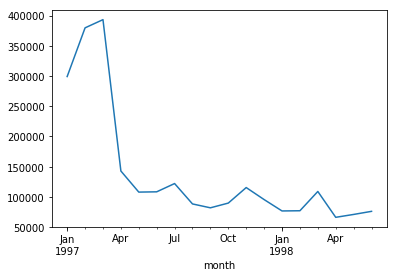

In [20]:
#以月份为窗口对其进行透视
data.groupby('month').order_price.sum().plot()

In [21]:
#我们从图中可以得知早起金额很高，后边逐渐下降。
#接下来探索原因：

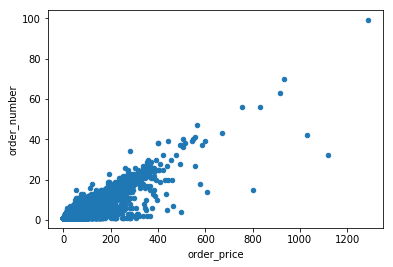

In [24]:
data.plot.scatter(x = 'order_price' ,y = 'order_number')
#每笔订单的散点图

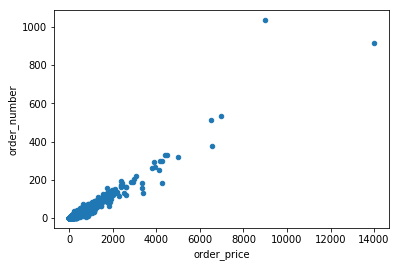

In [25]:
data.groupby('user_id').sum().plot.scatter(
    x = 'order_price', y = 'order_number')
#绘制用户的订单散点图

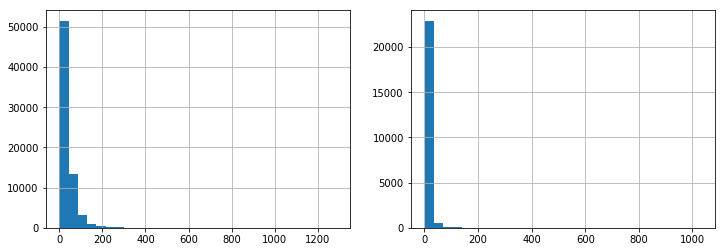

In [27]:
#都未发现明显异常点，订单均价在10元左右
#分析单个用户的消费行为
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
plt.subplot(121)
data.order_price.hist(bins = 30)
plt.subplot(122)
data.groupby('user_id').order_number.sum().hist(bins = 30)

In [28]:
#大部分顾客的消费能力一般，
#高消费用户在途总几乎看不到
#上图的信息还告诉我们，用户初次消费月份主要集中在前三个月
data.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [29]:
#用户最后消费月份，同样集中在前三个月，后边消费的用户逐渐变少

In [31]:
data.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [34]:
#接下来分析复购率和回购率
pivoted_counts = data.pivot_table(index = 'user_id', 
                                columns = 'month', 
                                values = 'order_day',
                                aggfunc = 'count').fillna(0) 
columns_month = data.month.sort_values().astype('str').unique() 
pivoted_counts.columns = columns_month 
pivoted_counts.head()

1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
user_id                                                               
1               1.0         0.0         0.0         0.0         0.0   
2               2.0         0.0         0.0         0.0         0.0   
3               1.0         0.0         1.0         1.0         0.0   
4               2.0         0.0         0.0         0.0         0.0   
5               2.0         1.0         0.0         1.0         1.0   

         1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
user_id                                                               
1               0.0         0.0         0.0         0.0         0.0   
2               0.0         0.0         0.0         0.0         0.0   
3               0.0         0.0         0.0         0.0         0.0   
4               0.0         0.0         1.0         0.0         0.0   
5               1.0         1.0         0.0         1.0         0.0   

         1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
user_id                                                               
1               0.0         0.0         0.0         0.0         0.0   
2               0.0         0.0         0.0         0.0         0.0   
3               2.0         0.0         0.0         0.0         0.0   
4               0.0         1.0         0.0         0.0         0.0   
5               0.0         2.0         1.0         0.0         0.0   

         1998-04-01  1998-05-01  1998-06-01  
user_id                                      
1               0.0         0.0         0.0  
2               0.0         0.0         0.0  
3               0.0         1.0         0.0  
4               0.0         0.0         0.0  
5               0.0         0.0         0.0

In [35]:
#函数说明： pandas中数据透视有专门的透视函数：pivot_table，
#在pivot_table参数中，index是设置数据透视后的索引，columns是设置透视后的列，
#values是按照哪个值进行计算，aggfunc是按照哪个函数进行计算，
#这里用values = ‘order_day’, aggfunc = 'count’就是统计order_day出现的次数，
#即订单数。某些用户在某月没有消费，会用NaN表示，这里用fillnan(0)，
#将其换为0。
#数据透视月份是月份是1997-01-01 00:00:00，
#将其转化为标准格式，
#columns_month = df.month.sort_values().astype(‘str’).unique()


In [36]:
pivoted_counts_transf = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_transf.head()

1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
user_id                                                               
1               0.0         NaN         NaN         NaN         NaN   
2               1.0         NaN         NaN         NaN         NaN   
3               0.0         NaN         0.0         0.0         NaN   
4               1.0         NaN         NaN         NaN         NaN   
5               1.0         0.0         NaN         0.0         0.0   

         1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
user_id                                                               
1               NaN         NaN         NaN         NaN         NaN   
2               NaN         NaN         NaN         NaN         NaN   
3               NaN         NaN         NaN         NaN         NaN   
4               NaN         NaN         0.0         NaN         NaN   
5               0.0         0.0         NaN         0.0         NaN   

         1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
user_id                                                               
1               NaN         NaN         NaN         NaN         NaN   
2               NaN         NaN         NaN         NaN         NaN   
3               1.0         NaN         NaN         NaN         NaN   
4               NaN         0.0         NaN         NaN         NaN   
5               NaN         1.0         0.0         NaN         NaN   

         1998-04-01  1998-05-01  1998-06-01  
user_id                                      
1               NaN         NaN         NaN  
2               NaN         NaN         NaN  
3               NaN         0.0         NaN  
4               NaN         NaN         NaN  
5               NaN         NaN         NaN

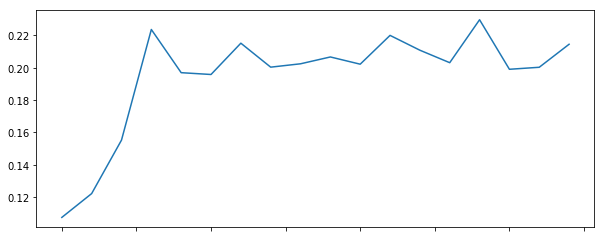

In [37]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(
    figsize = (10,4))

In [38]:
#由上图可以看出，在再起，由于新用户的大量加入，早期新客的复购率并不高，
#但随着时间的推移，出现比较多忠诚的老顾客，复购率上升，维持在20%左右。

In [40]:
pivoted_amount = data.pivot_table(index = 'user_id', 
                                columns = 'month',
                                values = 'order_price',
                                aggfunc = 'mean').fillna(0) 
columns_month = data.month.sort_values().astype('str').unique() 
pivoted_amount.columns = columns_month 
pivoted_amount.head()

1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
user_id                                                               
1             11.77         0.0        0.00        0.00        0.00   
2             44.50         0.0        0.00        0.00        0.00   
3             20.76         0.0       20.76       19.54        0.00   
4             29.53         0.0        0.00        0.00        0.00   
5             21.65        38.9        0.00       45.55       38.71   

         1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
user_id                                                               
1              0.00        0.00        0.00        0.00         0.0   
2              0.00        0.00        0.00        0.00         0.0   
3              0.00        0.00        0.00        0.00         0.0   
4              0.00        0.00       14.96        0.00         0.0   
5             26.14       28.14        0.00       40.47         0.0   

         1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
user_id                                                               
1             0.000       0.000        0.00         0.0         0.0   
2             0.000       0.000        0.00         0.0         0.0   
3            39.205       0.000        0.00         0.0         0.0   
4             0.000      26.480        0.00         0.0         0.0   
5             0.000      43.465       37.47         0.0         0.0   

         1998-04-01  1998-05-01  1998-06-01  
user_id                                      
1               0.0        0.00         0.0  
2               0.0        0.00         0.0  
3               0.0       16.99         0.0  
4               0.0        0.00         0.0  
5               0.0        0.00         0.0

In [41]:
#将消费金额进行了数据透视，这里简单使用了某一顾客一月内消费的平均值

In [42]:
pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x> 0 else 0)
pivoted_purchase.head()

1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
user_id                                                               
1                 1           0           0           0           0   
2                 1           0           0           0           0   
3                 1           0           1           1           0   
4                 1           0           0           0           0   
5                 1           1           0           1           1   

         1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
user_id                                                               
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 0           0           0           0           0   
4                 0           0           1           0           0   
5                 1           1           0           1           0   

         1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
user_id                                                               
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 1           0           0           0           0   
4                 0           1           0           0           0   
5                 0           1           1           0           0   

         1998-04-01  1998-05-01  1998-06-01  
user_id                                      
1                 0           0           0  
2                 0           0           0  
3                 0           1           0  
4                 0           0           0  
5                 0           0           0

In [45]:
#复购率函数
def purchase_return(data): 
    status = [] 
    for i in range(17): 
        if data[i] == 1: 
            if data[i+1] == 1: 
                status.append(1) 
            if data[i+1] == 0: 
                status.append(0) 
        else: 
            status.append(np.NaN)
    status.append(np.NaN)
    return status
from pandas import DataFrame
pivoted_purchase_return = pivoted_purchase.apply(purchase_return, axis = 1)
#此时输出为Series，需要将其转化为DataFrame类型，相应设置index和columns
columns_month = data.month.sort_values().astype('str').unique()
user_id = pivoted_purchase.index
pivoted_purchase_return1 = pd.DataFrame(list(pivoted_purchase_return),columns = columns_month, index = user_id)
#Series转化为Dataframe的方法：先转化为list类型，再转化为DataFrame，期间可传入columns
pivoted_purchase_return1.head()

1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
user_id                                                               
1               0.0         NaN         NaN         NaN         NaN   
2               0.0         NaN         NaN         NaN         NaN   
3               0.0         NaN         1.0         0.0         NaN   
4               0.0         NaN         NaN         NaN         NaN   
5               1.0         0.0         NaN         1.0         1.0   

         1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
user_id                                                               
1               NaN         NaN         NaN         NaN         NaN   
2               NaN         NaN         NaN         NaN         NaN   
3               NaN         NaN         NaN         NaN         NaN   
4               NaN         NaN         0.0         NaN         NaN   
5               1.0         0.0         NaN         0.0         NaN   

         1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
user_id                                                               
1               NaN         NaN         NaN         NaN         NaN   
2               NaN         NaN         NaN         NaN         NaN   
3               0.0         NaN         NaN         NaN         NaN   
4               NaN         0.0         NaN         NaN         NaN   
5               NaN         1.0         0.0         NaN         NaN   

         1998-04-01  1998-05-01  1998-06-01  
user_id                                      
1               NaN         NaN         NaN  
2               NaN         NaN         NaN  
3               NaN         0.0         NaN  
4               NaN         NaN         NaN  
5               NaN         NaN         NaN

In [46]:
#上面函数if的主要逻辑为，如果用户本月有消费，且下月有消费，记为1，
#下月无消费，记为0；如果用户本月没有消费，记为NaN。
#用apply函数且axis=1，应用在所有行上。

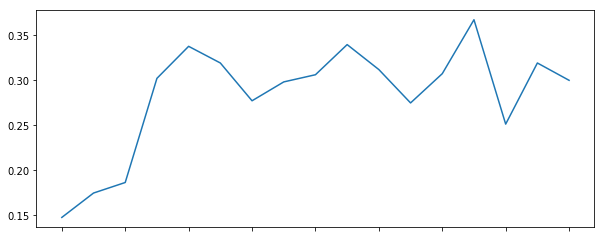

In [47]:
pivoted_purchase_return1.mean().plot(figsize = (10,4))

In [48]:
#从上图可以得出，用户的回购率约为30%，大于复购率20%

In [49]:
#按照用户的消费行为，将其分为4个维度：新用户、活跃用户、不活跃用户、回流用户。
#新用户指第一次消费。活跃用户即老客，指在某一个时间窗口内有过消费。不活跃用户指在某一个时间窗口内没有消费过的老客。回流用户指在上一个窗口内没有消费，在当前窗口内有消费。以上窗口按月计。
#例如，某一个用户，在1月份首次消费即是新用户；他在2月份又消费，则是活跃用户；3月份不消费，属于不活跃用户；4月份消费，此时是回流用户，5月份又消费，属于活跃用户。
#用户分层涉及到比较复杂的逻辑判断。

In [51]:
def active_ststus(data): 
    status = [] 
    for i in range(18): 
        #若本月没有消费 
        if data[i] == 0: 
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg') 
                else: 
                    status.append('unactive') 
            else: 
                status.append('unreg')
        #若本月有消费 
        else: 
            if len(status) == 0: 
                status.append('new') 
            else: 
                if status[i-1] == 'unactive': 
                    status.append('return') 
                elif status[i-1] == 'unreg':
                    status.append('new') 
                else:
                    status.append('active') 
    return status
pivoted_purchase_status = pivoted_purchase.apply(lambda x: active_ststus(x), axis = 1) 
#此时输出为Series，需要将其转化为DataFrame类型，相应设置index和columns 
columns_month = data.month.sort_values().astype('str').unique() 
user_id = pivoted_purchase.index 
pivoted_purchase_status1 = pd.DataFrame(list(pivoted_purchase_status),columns = columns_month, index = user_id) 
pivoted_purchase_status1.head()
#if逻辑判断部分比较复杂，主要分为两部分：如果本月没有消费，还要额外判断他是不是新客，如果一直不是新客，则延续之前的状态，设置为unreg。
#如果本月有消费，则需判断是不是第一次消费以及上一个时间窗口的消费状态。

1997-01-01 1997-02-01 1997-03-01 1997-04-01 1997-05-01 1997-06-01  \
user_id                                                                     
1              new   unactive   unactive   unactive   unactive   unactive   
2              new   unactive   unactive   unactive   unactive   unactive   
3              new   unactive     return     active   unactive   unactive   
4              new   unactive   unactive   unactive   unactive   unactive   
5              new     active   unactive     return     active     active   

        1997-07-01 1997-08-01 1997-09-01 1997-10-01 1997-11-01 1997-12-01  \
user_id                                                                     
1         unactive   unactive   unactive   unactive   unactive   unactive   
2         unactive   unactive   unactive   unactive   unactive   unactive   
3         unactive   unactive   unactive   unactive     return   unactive   
4         unactive     return   unactive   unactive   unactive     return   
5           active   unactive     return   unactive   unactive     return   

        1998-01-01 1998-02-01 1998-03-01 1998-04-01 1998-05-01 1998-06-01  
user_id                                                                    
1         unactive   unactive   unactive   unactive   unactive   unactive  
2         unactive   unactive   unactive   unactive   unactive   unactive  
3         unactive   unactive   unactive   unactive     return   unactive  
4         unactive   unactive   unactive   unactive   unactive   unactive  
5           active   unactive   unactive   unactive   unactive   unactive

In [52]:
purchase_status1_counts = pivoted_purchase_status1.replace('unreg', np.NaN).apply(pd.value_counts) 
#此时apply是在列上执行运算 #把unreg状态排除掉，他是未来作为新客，只是一个暂时状态。然后计算不同分层每月的统计量 
purchase_status1_counts

1997-01-01  1997-02-01  1997-03-01  1997-04-01  1997-05-01  \
active           NaN      1155.0        1680      1773.0       852.0   
new           7814.0      8455.0        7231         NaN         NaN   
return           NaN         NaN         595      1049.0      1362.0   
unactive         NaN      6659.0       13994     20678.0     21286.0   

          1997-06-01  1997-07-01  1997-08-01  1997-09-01  1997-10-01  \
active         747.0       746.0       604.0       528.0       532.0   
new              NaN         NaN         NaN         NaN         NaN   
return        1592.0      1434.0      1168.0      1211.0      1307.0   
unactive     21161.0     21320.0     21728.0     21761.0     21661.0   

          1997-11-01  1997-12-01  1998-01-01  1998-02-01  1998-03-01  \
active           624       632.0       512.0       472.0       569.0   
new                2         NaN         NaN         NaN         NaN   
return          1402      1232.0      1025.0      1079.0      1489.0   
unactive       21474     21638.0     21965.0     21951.0     21444.0   

          1998-04-01  1998-05-01  1998-06-01  
active         517.0       458.0       446.0  
new              NaN         NaN         NaN  
return         919.0      1030.0      1060.0  
unactive     22066.0     22014.0     21996.0

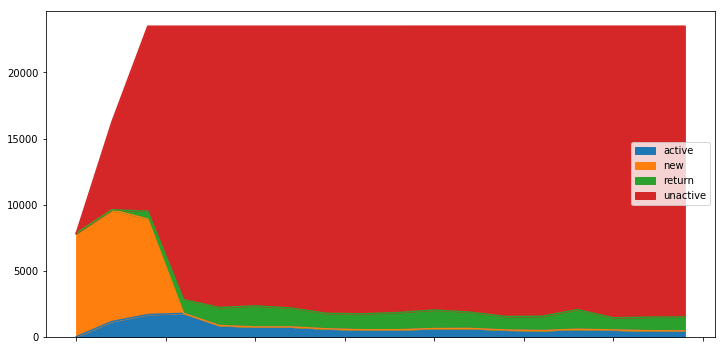

In [53]:
purchase_status1_counts.fillna(0).T.plot.area(figsize = (12,6))

In [54]:
#只看蓝色和绿色活跃用户和回流用户两个分层，他们的和就是消费用户占比。
#3月份之后，总量不再变化，说明后期没有新客。

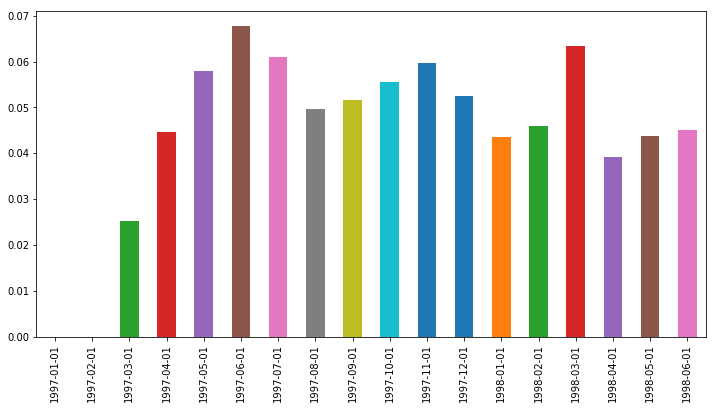

In [55]:
return_rate = purchase_status1_counts.apply(lambda x: x/x.sum())
return_rate.loc['return'].plot.bar(figsize = (12,6)) #每个月回流用户的占比

In [56]:
#回流用户占比为5%-8%之间，有下降趋势，回流用户占比，指在总用户中的占比。

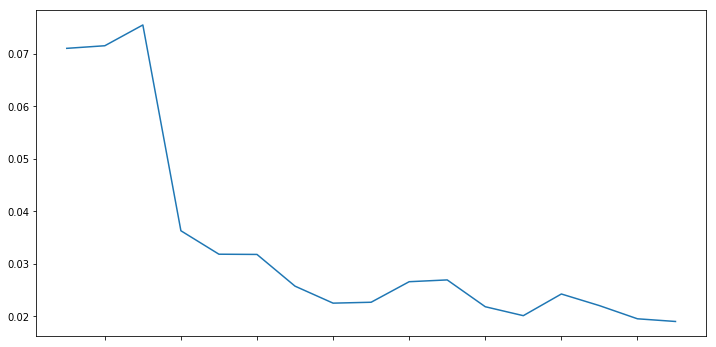

In [57]:
return_rate.loc['active'].plot(figsize = (12,6)) #每月活跃用户的占比

In [58]:
#活跃用户下降趋势更明显，后期占比为2%左右。
#活跃用户为连续消费用户，质量在一定程度上高于回流用户。

In [59]:
#结合回流用户和活跃用户，后期消费中60%是回流用户，40%是活跃用户，
#整体质量尚可，对于这两个分层依旧有改进空间，可以继续细化数据。

In [63]:
user_amount = data.groupby('user_id').order_price.sum().sort_values().reset_index() 
user_amount['amount_cumsum'] = user_amount.order_price.cumsum() 
user_amount.tail()

user_id  order_price  amount_cumsum
23565     7931      6497.18     2463822.60
23566    19339      6552.70     2470375.30
23567     7983      6973.07     2477348.37
23568    14048      8976.33     2486324.70
23569     7592     13990.93     2500315.63

In [65]:
#按照消费金额排序，cumsum是累加函数，逐行计算累积的金额，最后的2500315便是总消费金额

In [66]:
amount_total = user_amount.amount_cumsum.max() 
user_amount['prop'] = user_amount.apply(lambda x: x.amount_cumsum/amount_total, axis = 1) 
user_amount.tail()

user_id  order_price  amount_cumsum      prop
23565     7931      6497.18     2463822.60  0.985405
23566    19339      6552.70     2470375.30  0.988025
23567     7983      6973.07     2477348.37  0.990814
23568    14048      8976.33     2486324.70  0.994404
23569     7592     13990.93     2500315.63  1.000000

In [67]:
#转换成百分比

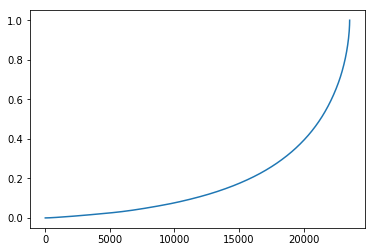

In [69]:
user_amount.prop.plot()

In [70]:
#图中可以明显的看出，前20000个用户贡献了40%的消费，
#后4000位用户贡献了60%的消费金额。

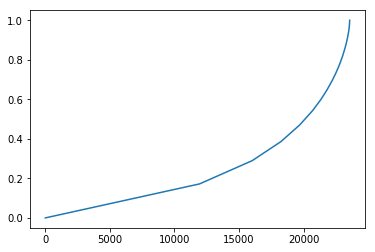

In [73]:
#同理，观察订单数量这个维度：
user_counts = data.groupby('user_id').order_day.count().sort_values().reset_index() 
user_counts['counts_cumsum'] = user_counts.order_day.cumsum() 
counts_total = user_counts.counts_cumsum.max() 
user_counts['prop'] = user_counts.apply(lambda x: 
                                        x.counts_cumsum/counts_total, 
                                        axis = 1) 
user_counts.prop.plot()


In [74]:
#前20000个用户贡献了45%的销量。消费领域，狠抓高质量用户才是王道。

In [75]:
#计算用户生命周期
#首先，定义：第一次消费至最后一次消费时间之差为用户的生命周期

In [78]:
user_purchase = data[['user_id','order_number','order_price','order_date']] 
order_date_min = user_purchase.groupby('user_id').order_date.min() 
order_date_max = user_purchase.groupby('user_id').order_date.max() 
(order_date_max-order_date_min).head(10)


user_id
1      0 days
2      0 days
3    511 days
4    345 days
5    367 days
6      0 days
7    445 days
8    452 days
9    523 days
10     0 days
Name: order_date, dtype: timedelta64[ns]

In [79]:
(order_date_max-order_date_min).mean()

Timedelta('134 days 20:55:36.987696')

In [80]:
#用户平均寿命为134天

In [81]:
#这里数据类型是timedelta时间，无法直接做直方图，需要先换算成数值。
#换算方法直接除以timedelat函数即可。这里的np.timedelta64(1, ‘D’)，
#D表示天，1表示1天，作为单位使用的。
#因为max-min已经表示为天了，两者相除就是周期的天数

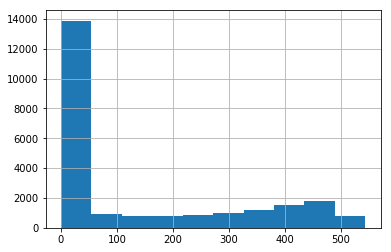

In [83]:
((order_date_max-order_date_min)/np.timedelta64(1,'D')).hist()

In [84]:
#可见大部分用户只消费了一次，用户生命周期都集中在了0天，这并不是我们想要的。
#因此将只消费一次的用户删除掉，来计算消费两次以上顾客的生命周期。

In [85]:
life_time = (order_date_max-order_date_min).reset_index() 
#转换为dataframe类型
life_time.head()

user_id order_date
0        1     0 days
1        2     0 days
2        3   511 days
3        4   345 days
4        5   367 days

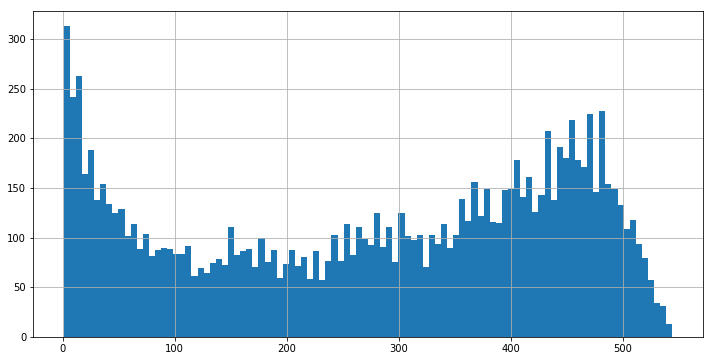

In [86]:
life_time['life_time'] = life_time.order_date/np.timedelta64(1,'D') 
life_time[life_time.life_time>0].life_time.hist(bins = 100, 
                                                figsize = (12,6))

In [87]:
#虽然仍有不少用户生命周期集中在0天，但比第一张图好很多了，呈现双峰趋势图。
#部分质量差的用户虽然消费了两次，但仍旧无法持续，在用户首次消费30天内应该尽量引导。
#少部分用户集中在50天～300天，属于普通型的生命周期，
#高质量用户的生命周期，集中在400天以后，这已经属于忠诚用户了。

In [88]:
life_time[life_time.life_time>0].life_time.mean()

276.0448072247308

In [89]:
#消费两次以上用户的生命周期是276天，远高于总体的134天

In [90]:
#计算留存率

In [91]:
user_purchase_retention = pd.merge(left = user_purchase, 
                                   right = order_date_min.reset_index(), 
                                   how = 'inner',
                                   on = 'user_id', 
                                   suffixes = ('', '_min') ) 
user_purchase_retention.head()


user_id  order_number  order_price order_date order_date_min
0        1             1        11.77 1997-01-01     1997-01-01
1        2             1        12.00 1997-01-12     1997-01-12
2        2             5        77.00 1997-01-12     1997-01-12
3        3             2        20.76 1997-01-02     1997-01-02
4        3             2        20.76 1997-03-30     1997-01-02

In [92]:
#这里的merge函数用来将两个DataFrame合并。
#这里选用inner join方法合并，以user_id为标准。
#suffxes参数是如果合并的内容中有重名column，加上后缀。

In [93]:
user_purchase_retention['order_date_diff'] = user_purchase_retention.order_date-user_purchase_retention.order_date_min 
#将日期转化为时间 
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(lambda x: x/np.timedelta64(1,'D')) 
#日期转换为时间 
user_purchase_retention.head()

user_id  order_number  order_price order_date order_date_min  \
0        1             1        11.77 1997-01-01     1997-01-01   
1        2             1        12.00 1997-01-12     1997-01-12   
2        2             5        77.00 1997-01-12     1997-01-12   
3        3             2        20.76 1997-01-02     1997-01-02   
4        3             2        20.76 1997-03-30     1997-01-02   

  order_date_diff  date_diff  
0          0 days        0.0  
1          0 days        0.0  
2          0 days        0.0  
3          0 days        0.0  
4         87 days       87.0

In [94]:
bin = [0,3,7,15,30,60,90,180,365] 
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, 
                                                  bins = bin) 
user_purchase_retention.head(10)


user_id  order_number  order_price order_date order_date_min  \
0        1             1        11.77 1997-01-01     1997-01-01   
1        2             1        12.00 1997-01-12     1997-01-12   
2        2             5        77.00 1997-01-12     1997-01-12   
3        3             2        20.76 1997-01-02     1997-01-02   
4        3             2        20.76 1997-03-30     1997-01-02   
5        3             2        19.54 1997-04-02     1997-01-02   
6        3             5        57.45 1997-11-15     1997-01-02   
7        3             4        20.96 1997-11-25     1997-01-02   
8        3             1        16.99 1998-05-28     1997-01-02   
9        4             2        29.33 1997-01-01     1997-01-01   

  order_date_diff  date_diff date_diff_bin  
0          0 days        0.0           NaN  
1          0 days        0.0           NaN  
2          0 days        0.0           NaN  
3          0 days        0.0           NaN  
4         87 days       87.0      (60, 90]  
5         90 days       90.0      (60, 90]  
6        317 days      317.0    (180, 365]  
7        327 days      327.0    (180, 365]  
8        511 days      511.0           NaN  
9          0 days        0.0           NaN

In [96]:
#利用cut函数将数据进行分箱。这里date_diff=0并没有被划分入0～3天，因为计算的是留存率，如果用户仅消费了一次，留存率应该是0。另外用户一天内多次消费，但以后没有消费，也算作留存率0.
#然后进行数据透视：

In [98]:
pivoted_retention = user_purchase_retention.pivot_table(
    index = 'user_id',                                                   
    columns = 'date_diff_bin',                                                     
    values = 'order_number',                                                      
    aggfunc = sum,                                                     
    dropna = False) 
pivoted_retention.head()

date_diff_bin  (0, 3]  (3, 7]  (7, 15]  (15, 30]  (30, 60]  (60, 90]  \
user_id                                                                
1                 NaN     NaN      NaN       NaN       NaN       NaN   
2                 NaN     NaN      NaN       NaN       NaN       NaN   
3                 NaN     NaN      NaN       NaN       NaN       4.0   
4                 NaN     NaN      NaN       2.0       NaN       NaN   
5                 NaN     NaN      1.0       NaN       3.0       NaN   

date_diff_bin  (90, 180]  (180, 365]  
user_id                               
1                    NaN         NaN  
2                    NaN         NaN  
3                    NaN         9.0  
4                    NaN         3.0  
5                    8.0        12.0

In [99]:
#用pivot_table数据透视，
#获得的结果是用户在第一次消费之后，在后续各时间段内的消费总额

In [101]:
pivoted_retention.mean()

date_diff_bin
(0, 3]        2.347551
(3, 7]        2.382850
(7, 15]       2.829030
(15, 30]      3.099813
(30, 60]      3.364737
(60, 90]      3.315745
(90, 180]     4.508829
(180, 365]    6.271764
dtype: float64

In [102]:
#计算了第一次消费过后，后续个时间段的消费平均值，虽然后面的时间段消费金额更高，但是其时间段更广，因此第一次消费后的0-3天内有可能消费更高。
#但仍然要看具体的数字，看有多少用户比例在初次购买后0-3天内再次消费：

In [103]:
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x>0 else 0)
pivoted_retention_trans.head()

date_diff_bin  (0, 3]  (3, 7]  (7, 15]  (15, 30]  (30, 60]  (60, 90]  \
user_id                                                                
1                   0       0        0         0         0         0   
2                   0       0        0         0         0         0   
3                   0       0        0         0         0         1   
4                   0       0        0         1         0         0   
5                   0       0        1         0         1         0   

date_diff_bin  (90, 180]  (180, 365]  
user_id                               
1                      0           0  
2                      0           0  
3                      0           1  
4                      0           1  
5                      1           1

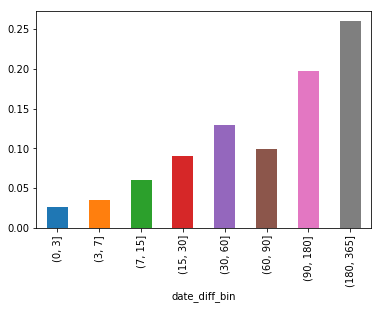

In [105]:
pivoted_retention_trans.mean().plot.bar()

In [106]:
#可见0-3天内再次消费的比例只有只有2.5%，3-7天之内的消费比例只有3%。
#说明CD购买并不是高频消费行为。时间范围放宽之后，数字好看了不少，
#有20%的用户在3个月到半年内再次购买，25%的用户在半年到一年内再次购买。

In [107]:
#计算用户平均消费间隔

In [108]:
##计算用户的消费间隔 
def diff(group): 
    d = group.date_diff - group.date_diff.shift(-1) 
    #shift(-1)是向下便宜一个位置；shift()是向上偏移一个位置；加参数axis=1则是左右偏移 
    return d 
last_diff = user_purchase_retention.groupby('user_id').apply(diff) 
last_diff.head(10).reset_index()

user_id  level_1  date_diff
0        1        0        NaN
1        2        1        0.0
2        2        2        NaN
3        3        3      -87.0
4        3        4       -3.0
5        3        5     -227.0
6        3        6      -10.0
7        3        7     -184.0
8        3        8        NaN
9        4        9      -17.0

In [109]:
last_diff.mean()

-68.97376814424265

In [110]:
#用mean函数即可求出用户的平均消费间隔时间是68天。想要召回用户，在60天左右的消费间隔是比较好的。

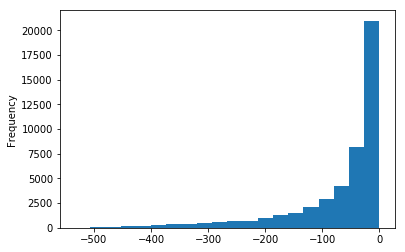

In [111]:
last_diff.plot.hist(bins = 20)

In [ ]:
#看一下直方图，典型的长尾分布，大部分用户的消费间隔确实比较短。